In [1]:
#Audio Processing Libraries
import librosa
import librosa.display
from scipy import signal

#For Playing Audios
import IPython.display as ipd

#Array Processing
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Display the confusion matrix
from sklearn.metrics import confusion_matrix

#Deal with .pkl files
import pickle

#Create a dataframe
import pandas as pd

#Transform and encode the categorical targets
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#Split dataset
from sklearn.model_selection import train_test_split

import os

H:\PYTHON\PYTHON SYSTEM FILES\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
H:\PYTHON\PYTHON SYSTEM FILES\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


## Ambulance

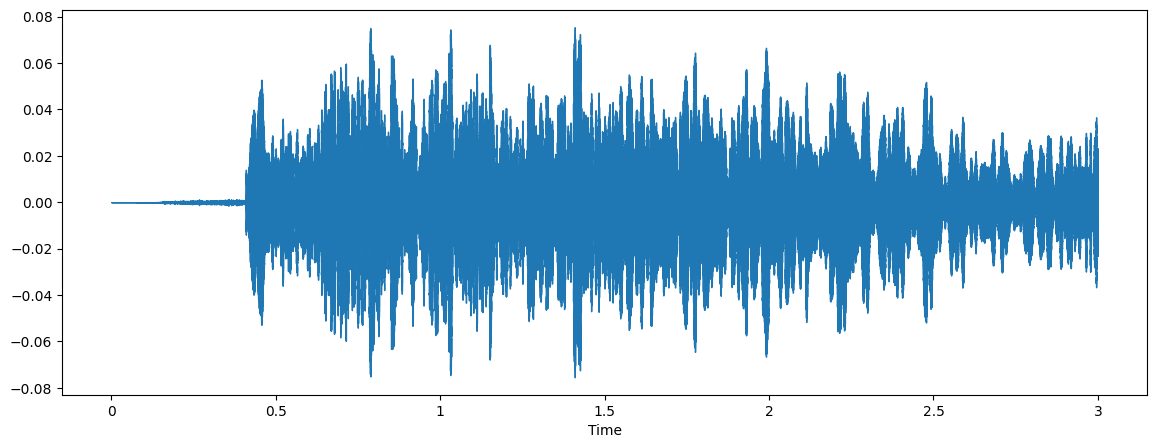

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [2]:
filename = "./sounds/ambulance/sound_1.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

##  Firetruck

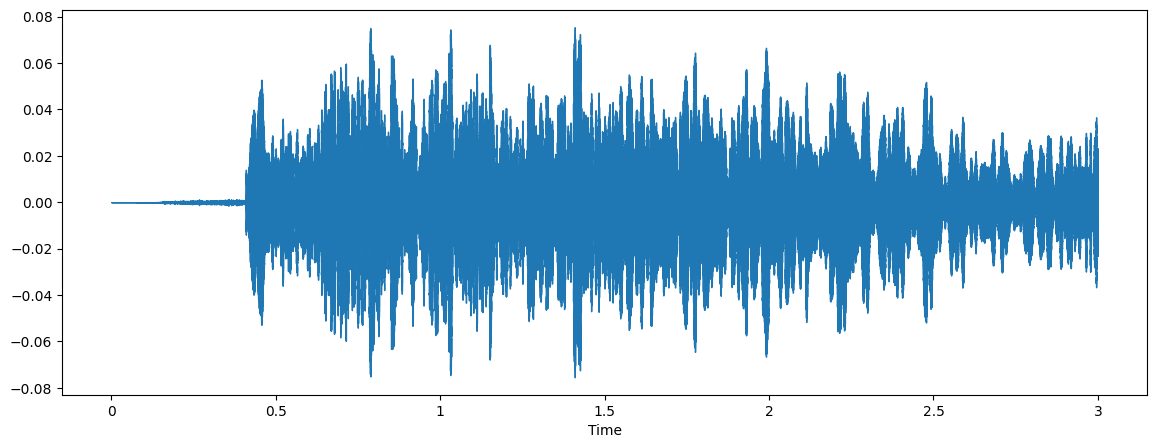

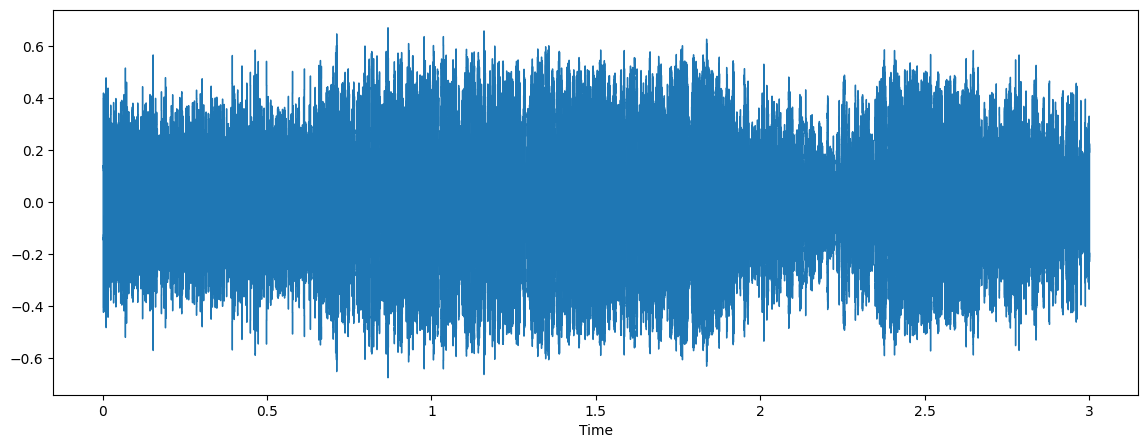

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [3]:
filename = "./sounds/firetruck/sound_201.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

## Traffic

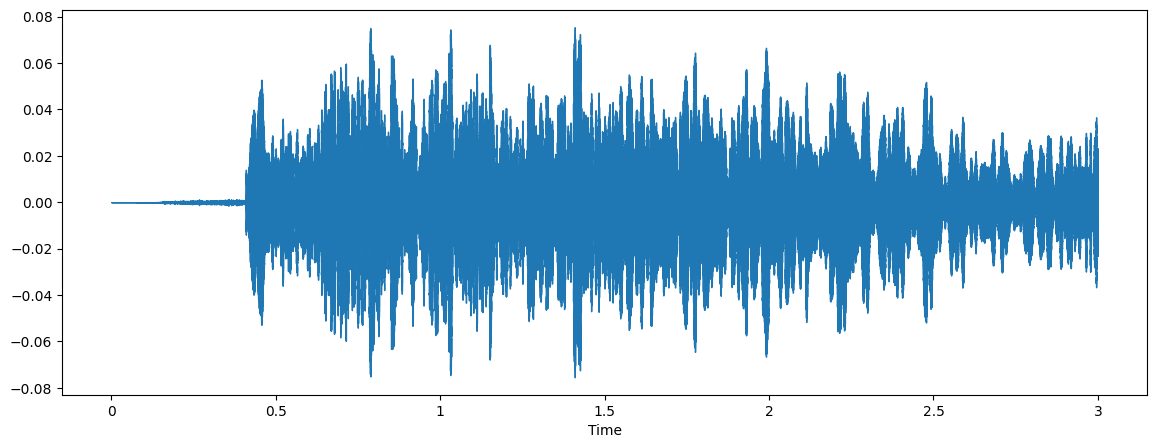

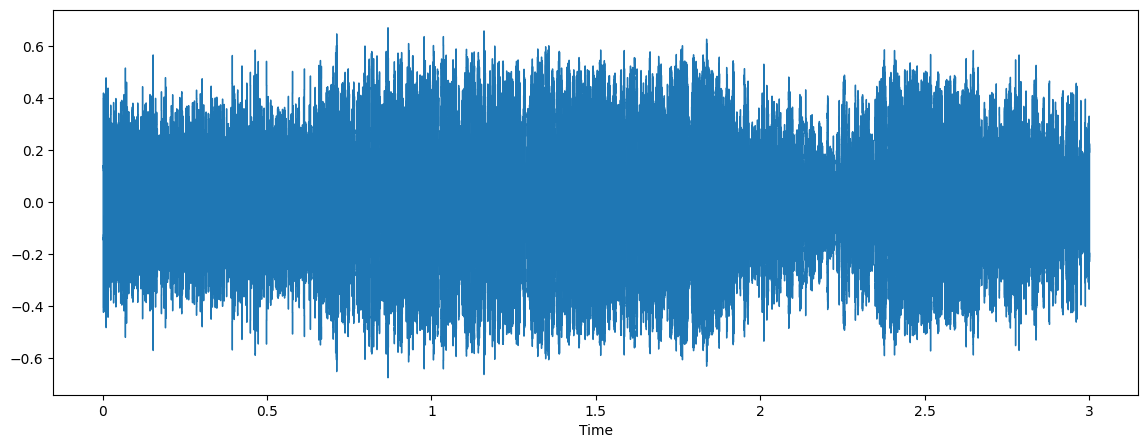

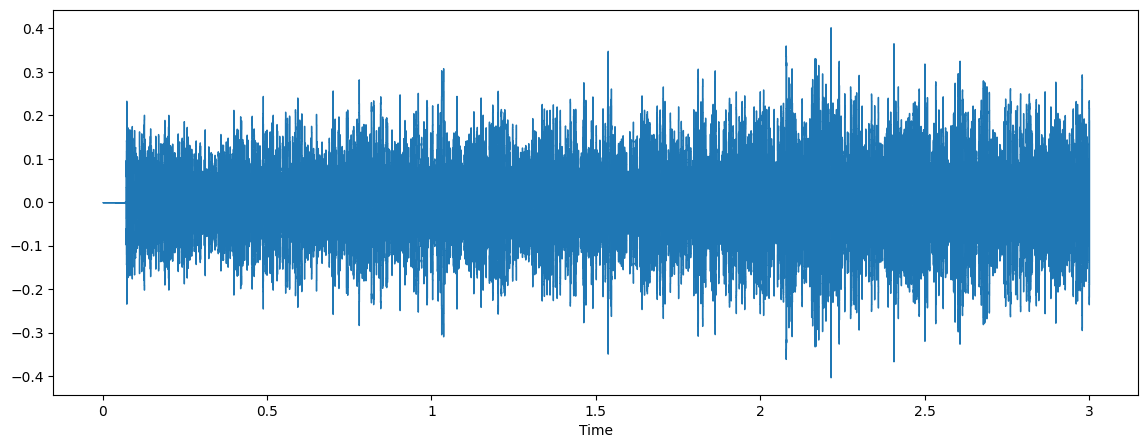

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [4]:
filename = "./sounds/traffic/sound_401.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

#  Data Preprocessing

## Using the function features_extractor to get a 80 MFCCs from each audio

In [5]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

## Now we iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients

In [6]:
audio_dataset_path = './sounds/'

extracted_features = []
for path in os.listdir(audio_dataset_path):
#     print(path)
    for file in os.listdir(audio_dataset_path+path+"/"):
        if file.lower().endswith(".wav"):
            file_name = audio_dataset_path+path+"/"+file
#             print(file_name)
            data = features_extractor(file_name)  
            extracted_features.append([data, path])



# Save the data frame into a .pkl file

In [7]:
f = open('./Extracted_Features.pkl', 'wb')
pickle.dump(extracted_features, f)
f.close()

# Read the Extracted_Features from the .pkl file

In [8]:
f = open('./Extracted_Features.pkl', 'rb')
Data = pickle.load(f)
f.close()

# Transform Data into a dataframe

In [9]:
df = pd.DataFrame(Data,columns=['feature','class'])
df.head()

,feature,class
0,"[-529.2778, 96.09123, -46.660313, -12.780942, ...",ambulance
1,"[-521.1548, 95.068886, -53.567135, -10.641551,...",ambulance
2,"[-38.777115, 104.3772, -40.953793, 1.8485571, ...",ambulance
3,"[-118.98806, 113.261086, -38.593113, -1.789974...",ambulance
4,"[-164.77432, 126.585754, -35.331738, -14.7402,...",ambulance


In [10]:
df['class'].value_counts()

class
ambulance    200
firetruck    200
traffic      200
Name: count, dtype: int64

# Splitting the data into train and test sets

In [11]:
X = np.array(df['feature'].tolist())
Y = np.array(df['class'].tolist())

In [12]:
X[0].shape

(80,)

In [13]:
X.shape

(600, 80)

In [14]:
Y.shape

(600,)

# Label Encoding

In [15]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [16]:
Y[0]

'ambulance'

In [17]:
y[0]

array([1., 0., 0.], dtype=float32)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0

In [19]:
y_train.shape

(480, 3)

#  Display the shape of each splits

In [20]:
X_train.shape

(480, 80)

In [21]:
X_test.shape

(120, 80)

In [22]:
y_test.shape

(120, 3)

#  Model Building

In [23]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
from sklearn import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import GridSearchCV
from datetime import datetime

# CNN

In [24]:
X_test.shape

(120, 80)

In [25]:
X_train_features  = X_train.reshape(len(X_train),-1,1)
X_test_features = X_test.reshape(len(X_test),-1,1)
print("Reshaped Array Size", X_train_features.shape)

Reshaped Array Size (480, 80, 1)


In [26]:
X_train.shape

(480, 80)

In [27]:
def cnn(optimizer="adam", activation="relu", dropout_rate=0.5):
    K.clear_session()
    inputs = Input(shape=(X_train_features.shape[1], X_train_features.shape[2]))
    
    #First Conv1D layer
    conv = Conv1D(3, 13, padding='same', activation=activation)(inputs)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='same', activation=activation)(conv)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)
    
    #MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)
    
    #Dense Layer 
    conv = Dense(16, activation=activation)(conv)
    outputs = Dense(y_test.shape[1], activation='softmax')(conv)
    
    model = Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc'])
    return model

In [28]:
model_cnn = cnn(optimizer="adam", activation="relu", dropout_rate=0)
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 80, 3)             42        
                                                                 
 max_pooling1d (MaxPooling1  (None, 40, 3)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 16)            544       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 20, 16)            0         
 g1D)                                                            
                                                                 
 global_max_pooling1d (Glob  (None, 16)                0     

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model_cnn, show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'keras.utils.vis_utils'

In [30]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max',
                          patience = 10, restore_best_weights = True)

history = model_cnn.fit(X_train_features, y_train, epochs = 200, 
                       callbacks = [early_stop],
                       batch_size = 64, validation_data = (X_test_features, y_test))

Epoch 1/200
8/8 [==============================] - 4s 95ms/step - loss: 7.9141 - acc: 0.4000 - val_loss: 4.9957 - val_acc: 0.4333
Epoch 2/200
8/8 [==============================] - 0s 32ms/step - loss: 3.0447 - acc: 0.4896 - val_loss: 1.4040 - val_acc: 0.5333
Epoch 3/200
8/8 [==============================] - 0s 30ms/step - loss: 1.0259 - acc: 0.4313 - val_loss: 1.1115 - val_acc: 0.2667
Epoch 4/200
8/8 [==============================] - 0s 25ms/step - loss: 0.9147 - acc: 0.4646 - val_loss: 0.8322 - val_acc: 0.6167
Epoch 5/200
8/8 [==============================] - 0s 25ms/step - loss: 0.6365 - acc: 0.7333 - val_loss: 0.5215 - val_acc: 0.7833
Epoch 6/200
8/8 [==============================] - 0s 21ms/step - loss: 0.4452 - acc: 0.8396 - val_loss: 0.4449 - val_acc: 0.8333
Epoch 7/200
8/8 [==============================] - 0s 20ms/step - loss: 0.3642 - acc: 0.8687 - val_loss: 0.3664 - val_acc: 0.8333
Epoch 8/200
8/8 [==============================] - 0s 21ms/step - loss: 0.3171 - acc: 0.86

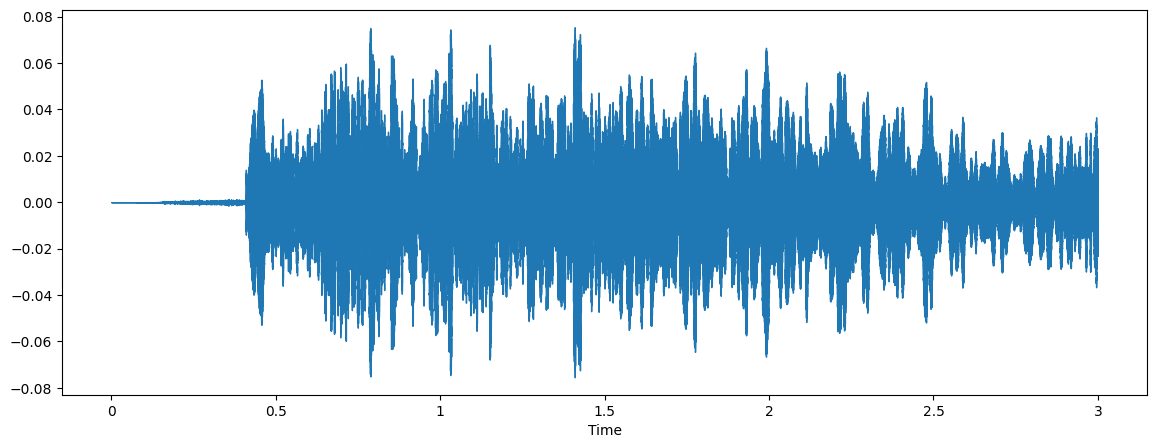

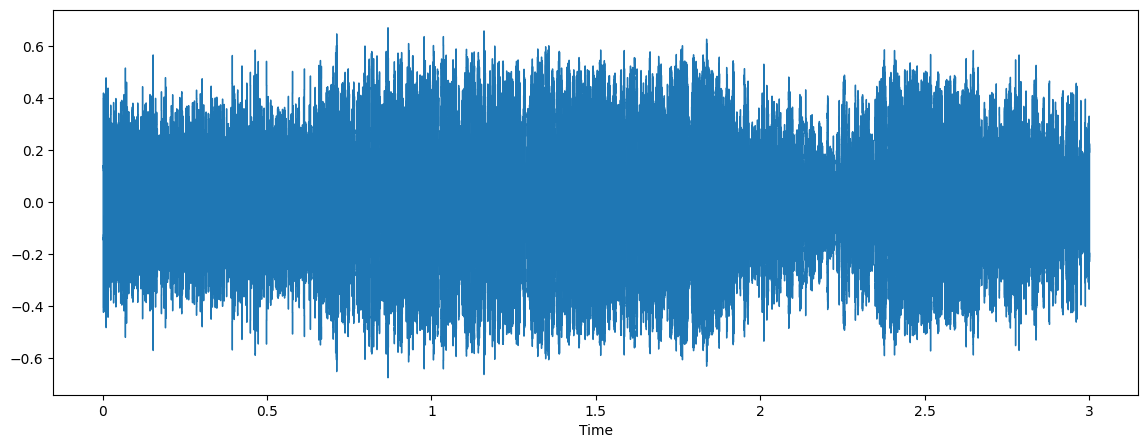

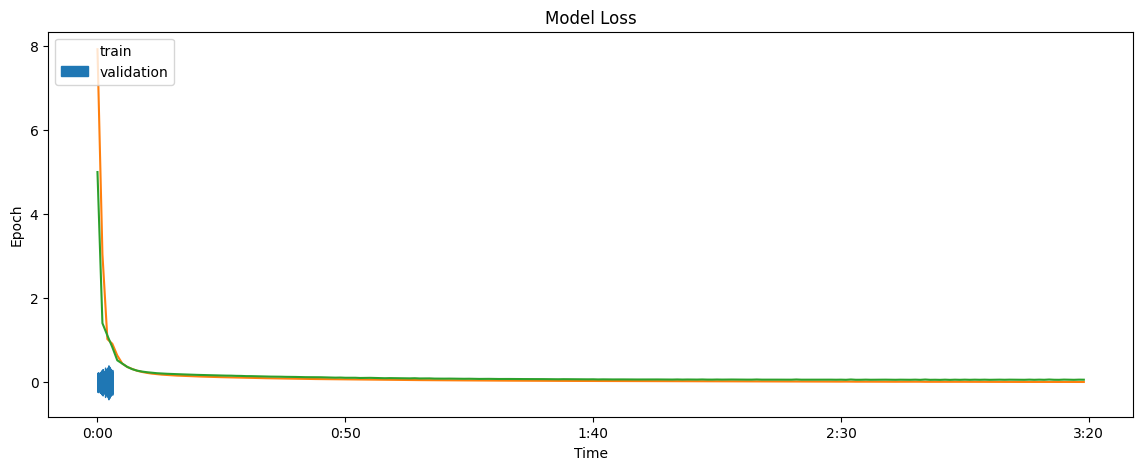

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [31]:
# Summarize History for Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [32]:
_, acc = model_cnn.evaluate(X_test_features, y_test)
print("Test Accuracy : ", acc)

4/4 [==============================] - 0s 7ms/step - loss: 0.0611 - acc: 0.9750
Test Accuracy :  0.9750000238418579


4/4 [==============================] - 0s 6ms/step
[[[-1.6457146e+02]
  [ 1.7986691e+02]
  [-2.1889252e+01]
  ...
  [-1.0876962e+00]
  [-3.7543154e-01]
  [-1.3452516e-01]]

 [[-1.2984348e+02]
  [ 1.3184148e+02]
  [-7.5690132e+01]
  ...
  [-2.0380446e-01]
  [-1.2435467e+00]
  [ 1.7883436e-01]]

 [[-2.4245947e+01]
  [ 9.4720779e+01]
  [-4.1762562e+01]
  ...
  [-4.2521687e+00]
  [-1.9104788e+00]
  [ 5.6201243e-01]]

 ...

 [[-1.4566652e+02]
  [ 1.1166930e+02]
  [-5.5761272e+01]
  ...
  [-8.6543721e-01]
  [-9.7863710e-01]
  [ 4.0532988e-01]]

 [[-2.8210446e+02]
  [ 1.1761000e+02]
  [-4.2805557e+01]
  ...
  [ 5.0226077e-02]
  [-2.0025301e-01]
  [-6.0064065e-01]]

 [[-3.2926660e+02]
  [ 1.0973470e+02]
  [-3.4316471e+01]
  ...
  [-5.0575852e-01]
  [-4.9476314e-01]
  [ 3.7948328e-01]]]


AttributeError: module 'matplotlib' has no attribute 'axes'

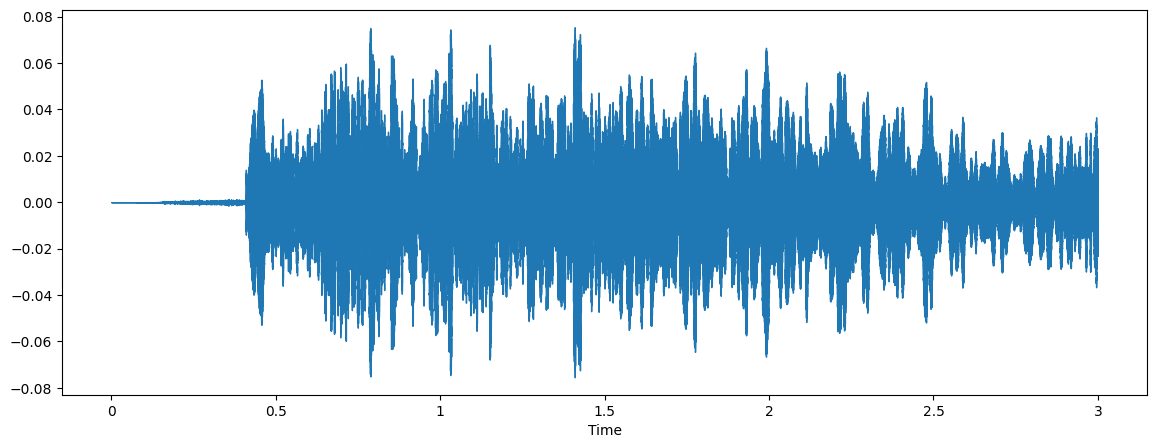

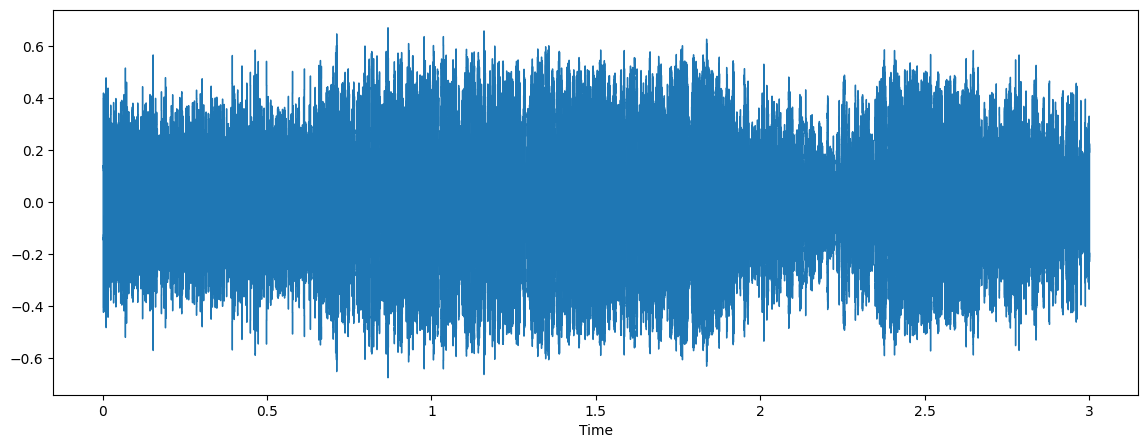

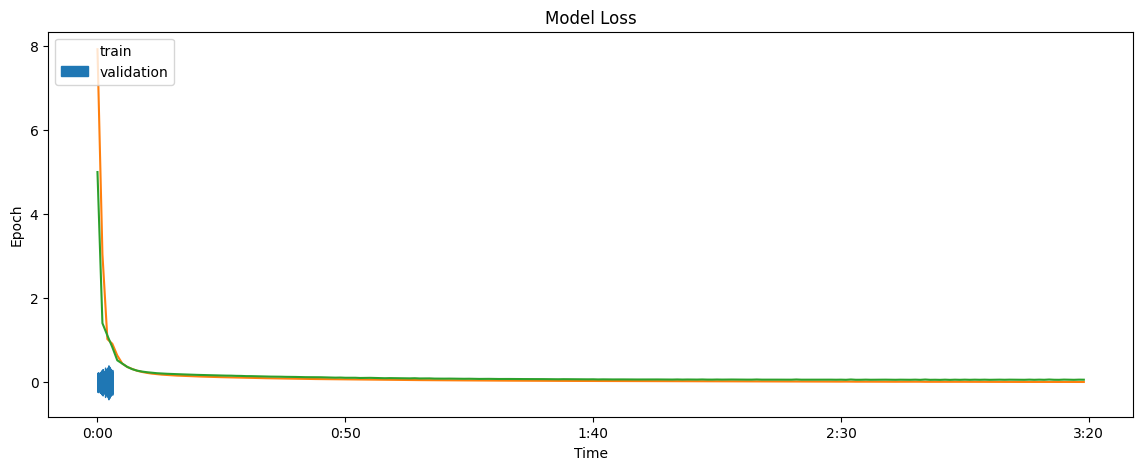

<Figure size 1200x1000 with 0 Axes>

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [33]:
y_pred = model_cnn.predict(X_test_features)
print(X_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
model_cnn.save('./CNN_Model')

INFO:tensorflow:Assets written to: ./CNN_Model\assets


INFO:tensorflow:Assets written to: ./CNN_Model\assets


# LSTM

In [36]:
x_train_features  = X_train.reshape(len(X_train),-1, 80)
x_test_features = X_test.reshape(len(X_test), -1, 80)
print("Reshaped Array Size", x_train_features.shape)

Reshaped Array Size (480, 1, 80)


In [37]:
def lstm(x_tr):
    K.clear_session()
    inputs = Input(shape=(x_tr.shape[1], x_tr.shape[2]))
    #lstm
    x = LSTM(128)(inputs)
    x = Dropout(0.5)(x)
    #dense
    x = Dense(64, activation='relu')(x)
    x = Dense(y_test.shape[1], activation='softmax')(x)
    model = Model(inputs, x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [38]:
model_lstm = lstm(x_train_features)
model_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 80)]           0         
                                                                 
 lstm (LSTM)                 (None, 128)               107008    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 115459 (451.01 KB)
Trainable params: 115459 (451.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
plot_model(model_lstm, show_shapes=True, show_layer_names=True)

NameError: name 'plot_model' is not defined

In [40]:
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [41]:
history = model_lstm.fit(x_train_features, y_train, epochs = 1000,
                        callbacks = [mc],
                        batch_size = 64, validation_data = (x_test_features, y_test))

Epoch 1/1000
7/8 [=========================>....] - ETA: 0s - loss: 0.5956 - acc: 0.4844 
Epoch 1: val_acc improved from -inf to 0.80000, saving model to best_model.hdf5
8/8 [==============================] - 6s 212ms/step - loss: 0.5928 - acc: 0.4979 - val_loss: 0.4932 - val_acc: 0.8000


H:\PYTHON\PYTHON SYSTEM FILES\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/1000
6/8 [=====================>........] - ETA: 0s - loss: 0.4772 - acc: 0.7734
Epoch 2: val_acc improved from 0.80000 to 0.80833, saving model to best_model.hdf5
8/8 [==============================] - 1s 71ms/step - loss: 0.4659 - acc: 0.7958 - val_loss: 0.3925 - val_acc: 0.8083
Epoch 3/1000
8/8 [==============================] - ETA: 0s - loss: 0.3616 - acc: 0.8750
Epoch 3: val_acc improved from 0.80833 to 0.82500, saving model to best_model.hdf5
8/8 [==============================] - 0s 40ms/step - loss: 0.3616 - acc: 0.8750 - val_loss: 0.3143 - val_acc: 0.8250
Epoch 4/1000
7/8 [=========================>....] - ETA: 0s - loss: 0.2824 - acc: 0.9107
Epoch 4: val_acc improved from 0.82500 to 0.84167, saving model to best_model.hdf5
8/8 [==============================] - 0s 41ms/step - loss: 0.2823 - acc: 0.9083 - val_loss: 0.2583 - val_acc: 0.8417
Epoch 5/1000
7/8 [=========================>....] - ETA: 0s - loss: 0.2171 - acc: 0.9263
Epoch 5: val_acc did not improve from 0.8

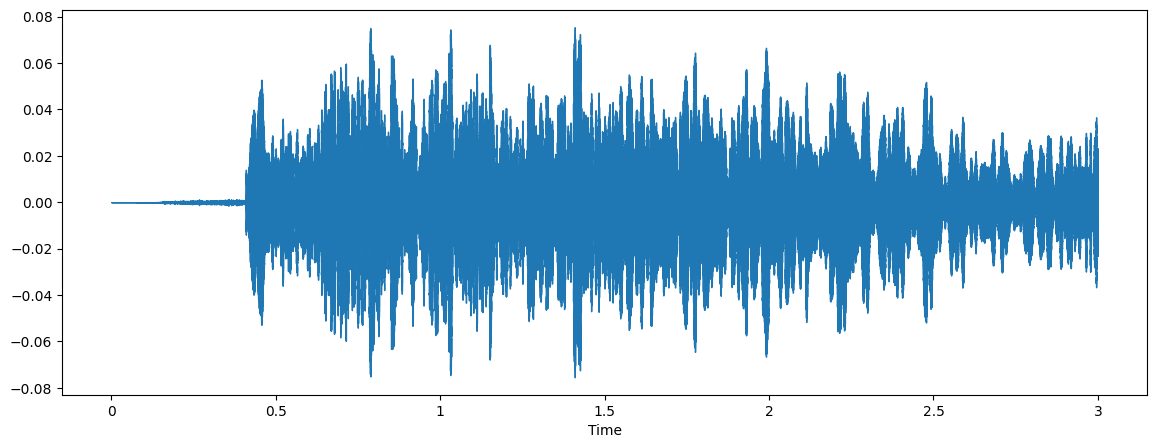

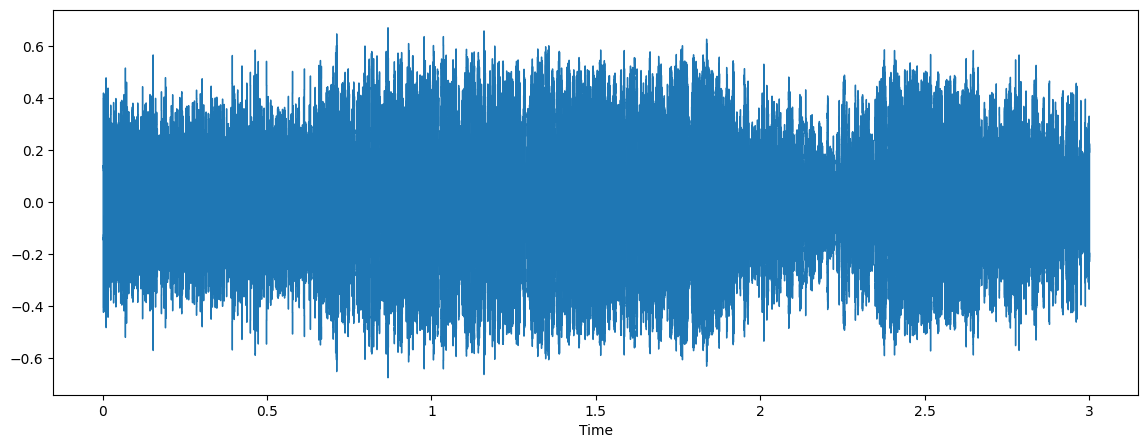

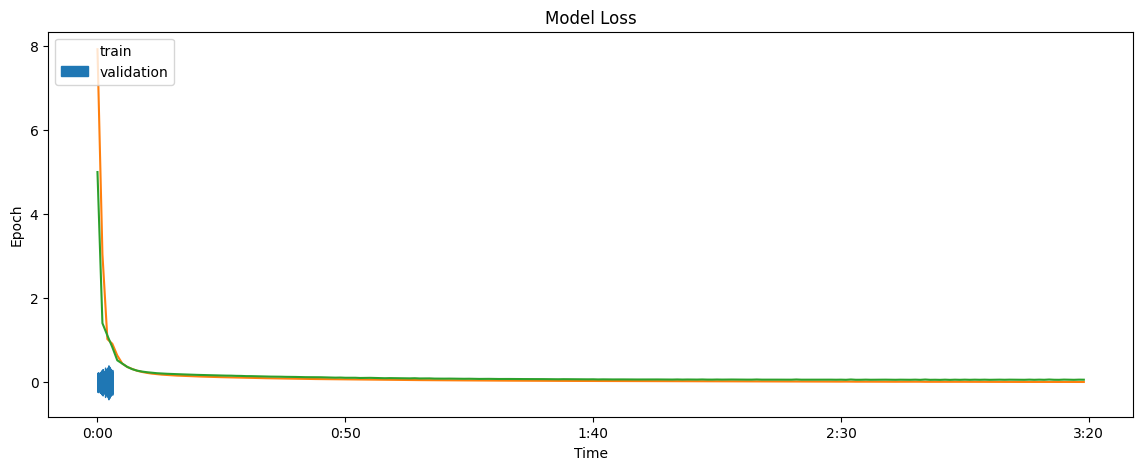

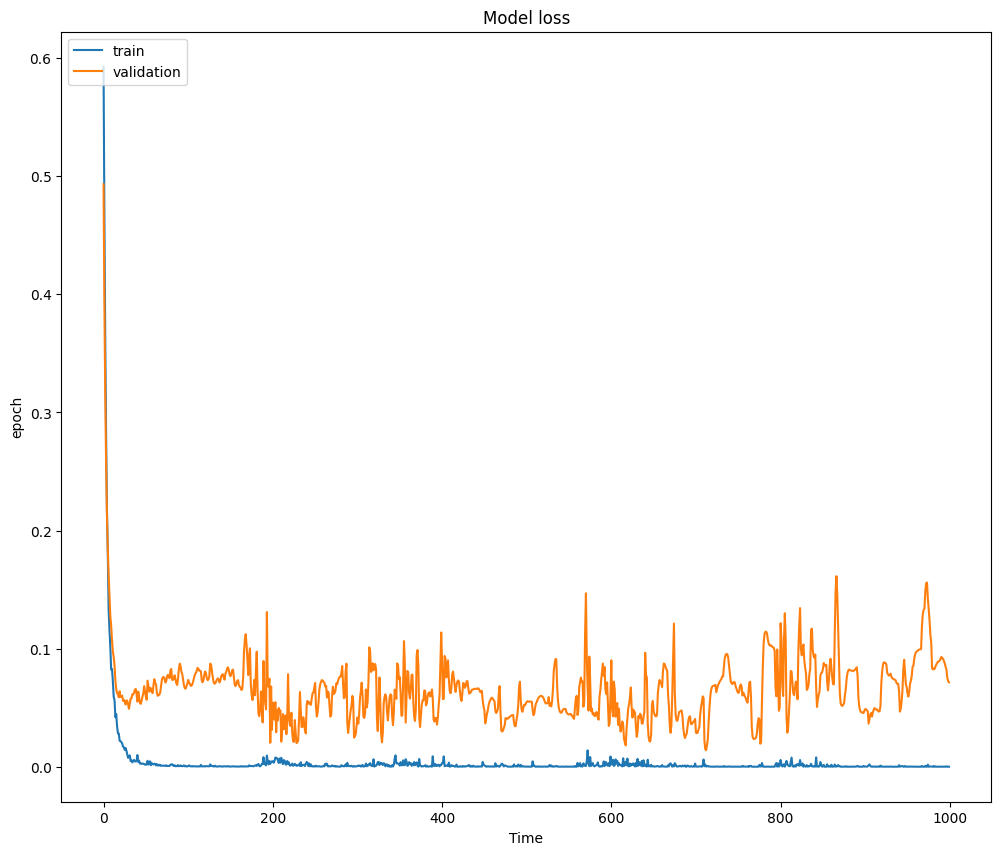

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [42]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Time')
plt.ylabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [43]:
_,acc = model_lstm.evaluate(x_test_features, y_test)
print("Accuracy:", acc)

4/4 [==============================] - 0s 6ms/step - loss: 0.0715 - acc: 0.9833
Accuracy: 0.9833333492279053


4/4 [==============================] - 1s 6ms/step


AttributeError: module 'matplotlib' has no attribute 'axes'

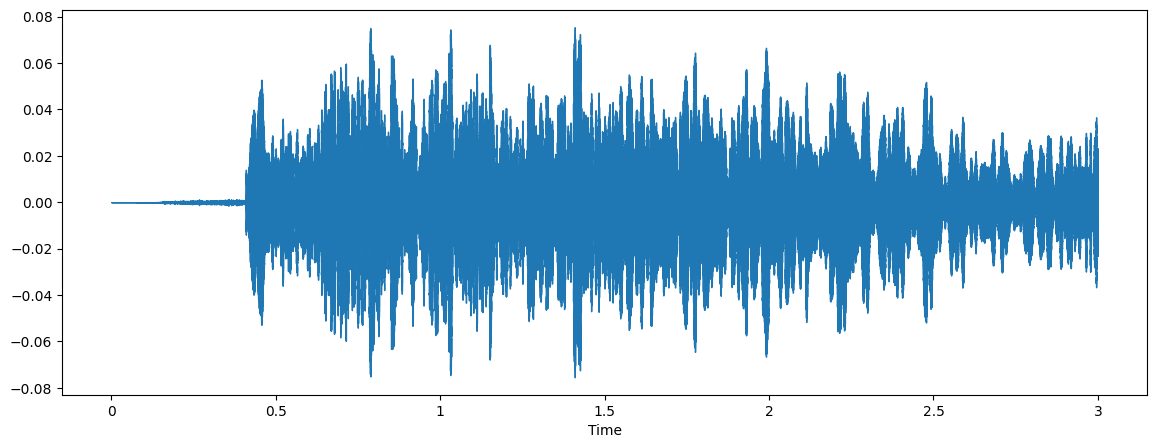

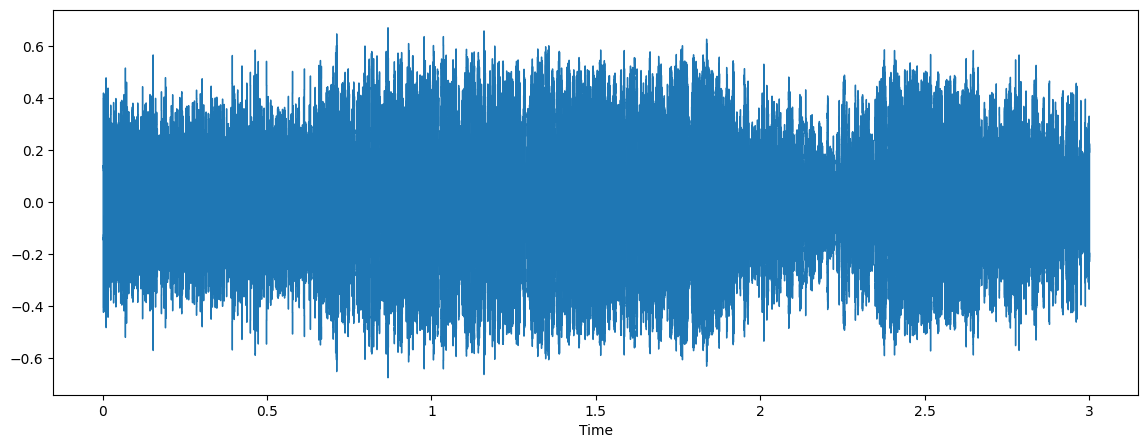

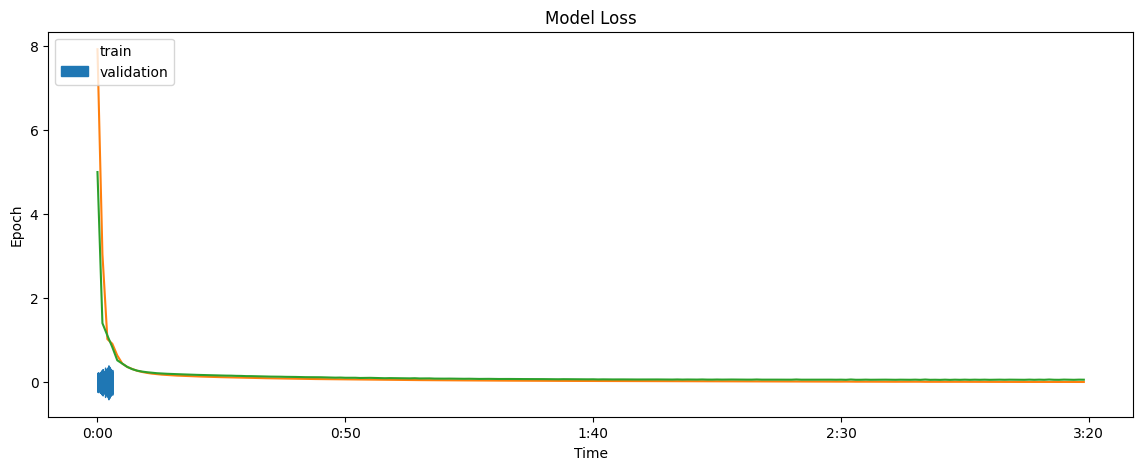

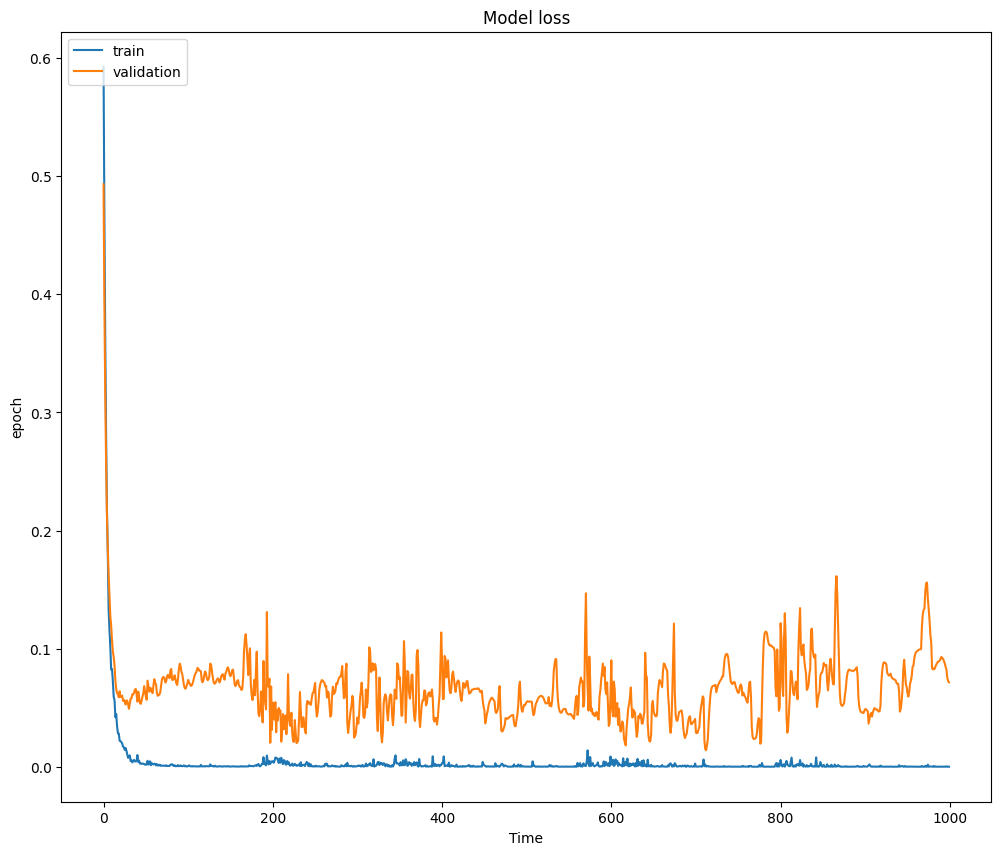

<Figure size 1200x1000 with 0 Axes>

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [44]:
y_pred = model_lstm.predict(x_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
model_lstm.save('./LSTM')

INFO:tensorflow:Assets written to: ./LSTM\assets


INFO:tensorflow:Assets written to: ./LSTM\assets


# CONCLUSION

In [47]:
def handleNewAudio(inputFileName):
    newFeature=[]

    data2 = features_extractor(inputFileName+".wav")  
    newFeature.append([data2, "./"+inputFileName+".wav"])
    
    f = open('./Extracted_Features_test.pkl', 'wb')
    pickle.dump(newFeature, f)
    f.close()
    
    f = open('./Extracted_Features_test.pkl', 'rb')
    Data2 = pickle.load(f)
    f.close()
    
    
    newDf = pd.DataFrame(Data2,columns=['feature','class'])
    
    
    newTestFeatures = Data2[0][0].reshape(1,1,len(Data2[0][0]))

    newY_pred = model_lstm.predict(newTestFeatures)
    print(newY_pred)

    return newY_pred
        
    

In [59]:
ansArr = handleNewAudio("sound_1")
answer=""
if((ansArr[0][2]>ansArr[0][0]) and (ansArr[0][2]>ansArr[0][1])):
        answer = "traffic"
else:
        answer = "ambulance"
print(answer)

1/1 [==============================] - 0s 28ms/step
[[1.0000000e+00 4.0013041e-21 3.4442233e-22]]
ambulance


In [60]:
import requests
def sendrequest(prediction): 
    # 'http://<nodemcu-device-ip>:<nodemcu-device-port>/process'
    url = 'http://192.168.163.77:80/post'
    data = {'prediction': prediction}
    print(data)
    response = requests.post(url, json=data)
    if response.status_code == 200:
        print('POST request successful')
    else:
        print('POST request failed: ', response)

In [61]:
sendrequest(answer)

{'prediction': 'ambulance'}
POST request successful
